In [1]:
#Libraries for classifiers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score
from sklearn import metrics

In [2]:
#importing necessary libraries into our code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff



# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score

from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict


# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [4]:

import pandas as pd
DataPath = ('data (1).csv')
data = pd.read_csv(DataPath)
print(data.head())
data.shape

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

(569, 33)

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Loading our dataset
DataPath = 'data (1).csv'
data = pd.read_csv(DataPath)

# Displaying the first few rows of the dataset
print(data.head())

# Displaying the shape of the dataset
print(data.shape)

# Defining target and categorical columns
target_col = ["presence"]
cat_cols = data.nunique()[data.nunique() < 3].keys().tolist()
print(cat_cols)
cat_cols = [x for x in cat_cols]
print(cat_cols)

# Defining numerical columns
num_cols = [x for x in data.columns if x not in cat_cols + target_col]
print(num_cols)

# Binary columns with 2 values
bin_cols = data.nunique()[data.nunique() == 2].keys().tolist()
print(bin_cols)

# Columns with more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]
print(multi_cols)

# Label encoding binary columns
le = LabelEncoder()
for i in bin_cols:
    data[i] = le.fit_transform(data[i])
    
# Duplicating columns for multi-value columns
data = pd.get_dummies(data=data, columns=multi_cols)
print(data)

# Scaling numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

# Dropping original values and merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns=num_cols, axis=1)
data = data.merge(scaled, left_index=True, right_index=True, how="left")

print(data)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [6]:
import numpy as np
import random
from datetime import datetime

In [7]:
data.head(20)

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,1,-0.236393,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1,-0.236389,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,1,0.433000,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,1,-0.236384,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,1,0.433343,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [8]:
import pandas as pd
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier


In [9]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [10]:
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [11]:
import random
import math # cos() for Rastrigin
import copy # array-copying convenience
import sys	 # max float

In [12]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [13]:
target_col = ["Outcome"]
cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

In [14]:
df = data.copy()

In [15]:
df.head(50)

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,1,-0.236393,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1,-0.236389,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,1,0.433000,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,1,-0.236384,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,1,0.433343,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [16]:
y = data['diagnosis'].values
X = data.drop('diagnosis',axis=1).values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Iteration 20:
Worst Lemur Accuracy: 0.9902200488997555
Worst Lemur Diversity (Hamming Distance): 0.034229828850855744
Worst Lemur Fitness: 0.7968593987832512

Iteration 40:
Worst Lemur Accuracy: 0.992822966507177
Worst Lemur Diversity (Hamming Distance): 0.0215311004784689
Worst Lemur Fitness: 0.7977860448438533

Iteration 60:
Worst Lemur Accuracy: 0.9883449883449883
Worst Lemur Diversity (Hamming Distance): 0.03496503496503497
Worst Lemur Fitness: 0.796423402987994

Iteration 80:
Worst Lemur Accuracy: 0.9808219178082191
Worst Lemur Diversity (Hamming Distance): 0.06027397260273973
Worst Lemur Fitness: 0.8010874927389093

Iteration 100:
Worst Lemur Accuracy: 0.9901960784313726
Worst Lemur Diversity (Hamming Distance): 0.03431372549019608
Worst Lemur Fitness: 0.8006430626969081



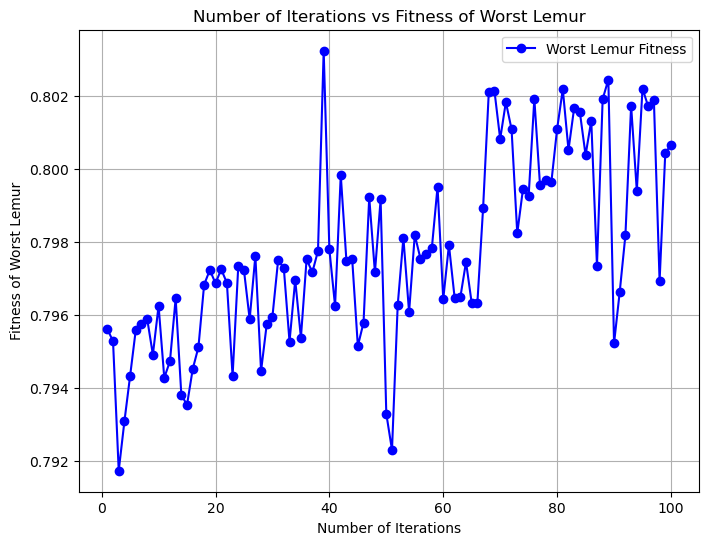

In [32]:
#Diversity measure of Hamming distance (worstbag 5)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=10):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1]- data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()

Iteration 20:
Worst Lemur Accuracy: 0.9912472647702407
Worst Lemur Diversity (Hamming Distance): 0.02188183807439825
Worst Lemur Fitness: 0.7978048518677544

Iteration 40:
Worst Lemur Accuracy: 0.981081081081081
Worst Lemur Diversity (Hamming Distance): 0.04054054054054054
Worst Lemur Fitness: 0.7964535005164031

Iteration 60:
Worst Lemur Accuracy: 0.9902912621359223
Worst Lemur Diversity (Hamming Distance): 0.014563106796116505
Worst Lemur Fitness: 0.7947614603351759

Iteration 80:
Worst Lemur Accuracy: 0.992633517495396
Worst Lemur Diversity (Hamming Distance): 0.022099447513812154
Worst Lemur Fitness: 0.7985415001182148

Iteration 100:
Worst Lemur Accuracy: 0.988009592326139
Worst Lemur Diversity (Hamming Distance): 0.03597122302158273
Worst Lemur Fitness: 0.7985362721201041



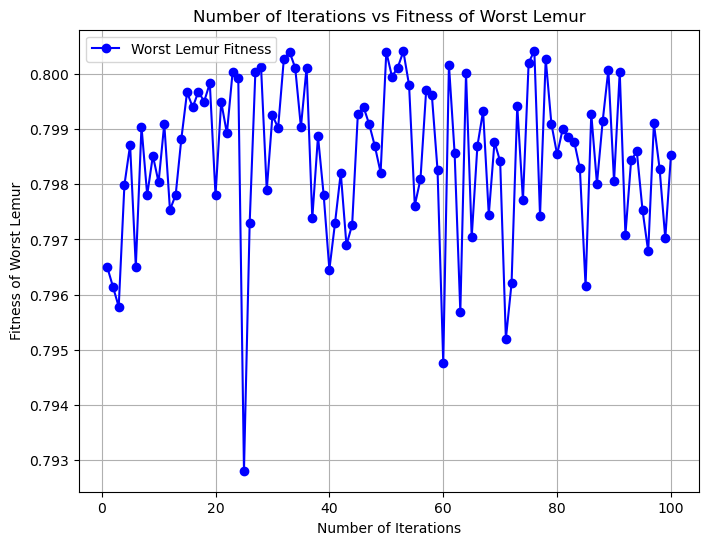

In [20]:
#Diversity measure of Hamming distance (worstbag 10)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=10):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1]- data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()

Iteration 20:
Worst Lemur Accuracy: 0.9944903581267218
Worst Lemur Diversity (Hamming Distance): 0.02203856749311295
Worst Lemur Fitness: 0.7980090479273555

Iteration 40:
Worst Lemur Accuracy: 0.9908883826879271
Worst Lemur Diversity (Hamming Distance): 0.03189066059225513
Worst Lemur Fitness: 0.7991357082757994

Iteration 60:
Worst Lemur Accuracy: 0.9881889763779528
Worst Lemur Diversity (Hamming Distance): 0.025590551181102362
Worst Lemur Fitness: 0.7965259832385817

Iteration 80:
Worst Lemur Accuracy: 0.9890590809628009
Worst Lemur Diversity (Hamming Distance): 0.0350109409190372
Worst Lemur Fitness: 0.7988451134785927

Iteration 100:
Worst Lemur Accuracy: 0.9911504424778761
Worst Lemur Diversity (Hamming Distance): 0.035398230088495575
Worst Lemur Fitness: 0.7999682520700219



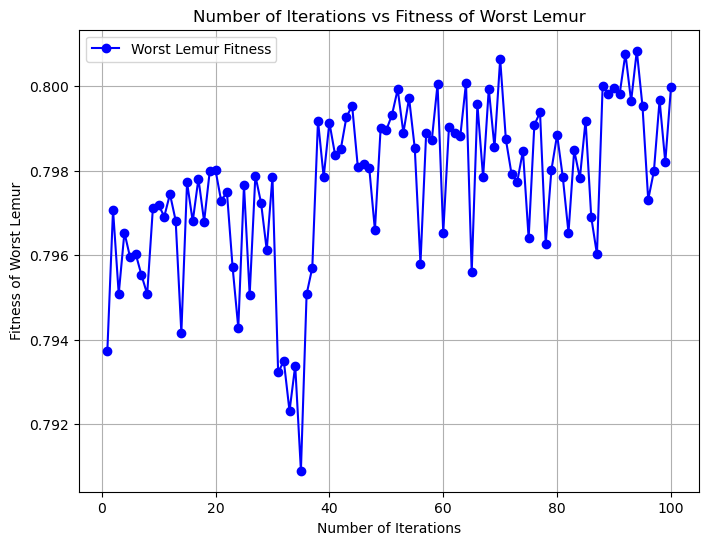

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9736842105263158
AUC: 0.9697019325253848
Sensitivity (Recall): 0.9534883720930233
Specificity: 0.9859154929577465
Precision: 0.9761904761904762
F1 Score: 0.9647058823529412
G-measure: 0.9695663764805236
G-measure: 0.9695663764805236


In [18]:
#BEST BAG HAMMING 10 BAGS 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=100):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1]- data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal lemur
    classifier = clf['model']
    optimal_lemur = optimal_lemurs[idx]
    
    # Train the classifier on the optimal lemur (training data)
    classifier.fit(X[optimal_lemur], y[optimal_lemur])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)
print("G-measure:", g_measure)

Iteration 20:
Worst Lemur Accuracy: 0.9860279441117764
Worst Lemur Diversity (Hamming Distance): 0.041916167664670656
Worst Lemur Fitness: 0.7956493021500805

Iteration 40:
Worst Lemur Accuracy: 0.9913793103448276
Worst Lemur Diversity (Hamming Distance): 0.015086206896551725
Worst Lemur Fitness: 0.7947067378152664

Iteration 60:
Worst Lemur Accuracy: 0.9888392857142857
Worst Lemur Diversity (Hamming Distance): 0.033482142857142856
Worst Lemur Fitness: 0.7985664553196332

Iteration 80:
Worst Lemur Accuracy: 0.9895833333333334
Worst Lemur Diversity (Hamming Distance): 0.03125
Worst Lemur Fitness: 0.7984920505577285

Iteration 100:
Worst Lemur Accuracy: 0.9888888888888889
Worst Lemur Diversity (Hamming Distance): 0.03333333333333333
Worst Lemur Fitness: 0.7965882684715172



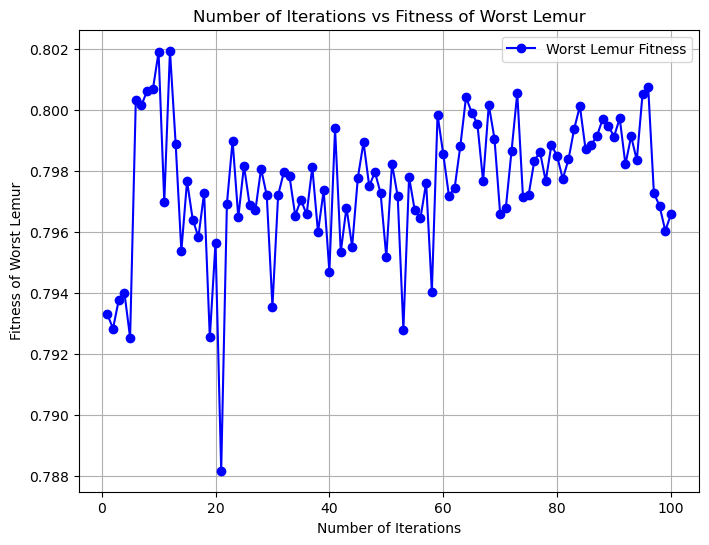

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9912280701754386
AUC: 0.9883720930232558
Sensitivity (Recall): 0.9767441860465116
Specificity: 1.0
Precision: 1.0
F1 Score: 0.988235294117647
G-measure: 0.9883036912035246
G-measure: 0.9883036912035246


In [19]:
#BEST BAG HAMMING 5 BAGS 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=100):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1]- data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal lemur
    classifier = clf['model']
    optimal_lemur = optimal_lemurs[idx]
    
    # Train the classifier on the optimal lemur (training data)
    classifier.fit(X[optimal_lemur], y[optimal_lemur])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)
print("G-measure:", g_measure)

